# **<p style="text-align: center;"><u>Uber Data Analysis</u></p>**

## Imports

In [2]:
import pandas as pd
import numpy as np

## Loading and Understanding Data

In [3]:
df = pd.read_csv('Data/uber_data.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
4007,2,2016-03-10 07:31:02,2016-03-10 07:50:18,1,2.25,-73.972916,40.782608,1,N,-73.978638,40.758617,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
33190,2,2016-03-10 10:06:27,2016-03-10 10:19:21,1,1.70,-74.005455,40.727386,1,N,-73.990089,40.738281,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80
83124,2,2016-03-01 02:16:33,2016-03-01 02:18:45,1,0.37,-73.964996,40.759563,1,N,-73.965454,40.755192,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
68489,2,2016-03-10 13:27:44,2016-03-10 13:34:17,5,1.02,-73.955421,40.768570,1,N,-73.955437,40.779449,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76
84465,1,2016-03-01 02:48:07,2016-03-01 02:55:32,1,2.10,-73.992439,40.750565,1,N,-73.984642,40.768368,1,8.5,0.5,0.5,0.10,0.0,0.3,9.90


In [4]:
df.shape

(100000, 19)

Our data contains `100000` samples and `19` features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [6]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,2016-03-08 06:42:50.246160128,2016-03-08 06:59:44.592359936,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
min,1.00000,2016-03-01 00:00:00,2016-03-01 00:00:00,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,2016-03-10 07:18:30,2016-03-10 07:29:44.750000128,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,2016-03-10 09:29:43.500000,2016-03-10 09:45:47,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2016-03-10 12:03:33.249999872,2016-03-10 12:20:23.249999872,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,2016-03-10 14:27:09,2016-03-11 14:19:17,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000
std,0.32110,NaN,NaN,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180


In [7]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
df.duplicated().sum()

0

Data has no duplicates or null values.

## Exploratory Data Analysis

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

### Univariate Analysis

#### Categorical Columns

In [10]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
76620,2,2016-03-10 13:40:26,2016-03-10 13:47:21,1,1.62,-73.971504,40.763897,1,N,-73.957268,40.783241,1,7.5,0.0,0.5,1.20,0.0,0.3,9.50
39187,2,2016-03-10 10:43:49,2016-03-10 10:49:15,1,0.53,-73.989487,40.746960,1,N,-73.993538,40.751659,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96
5401,2,2016-03-10 07:38:38,2016-03-10 07:42:24,1,0.58,-73.959969,40.776569,1,N,-73.958092,40.781879,1,4.5,0.0,0.5,1.06,0.0,0.3,6.36
81980,1,2016-03-01 01:53:22,2016-03-01 01:56:22,1,0.70,-73.985077,40.758259,1,N,-73.974266,40.753662,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
39136,2,2016-03-10 10:43:33,2016-03-10 10:58:37,1,2.41,-73.976929,40.747314,1,N,-73.951492,40.771801,1,11.5,0.0,0.5,2.00,0.0,0.3,14.30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [12]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    99876
Y      124
Name: count, dtype: int64

<Axes: xlabel='store_and_fwd_flag'>

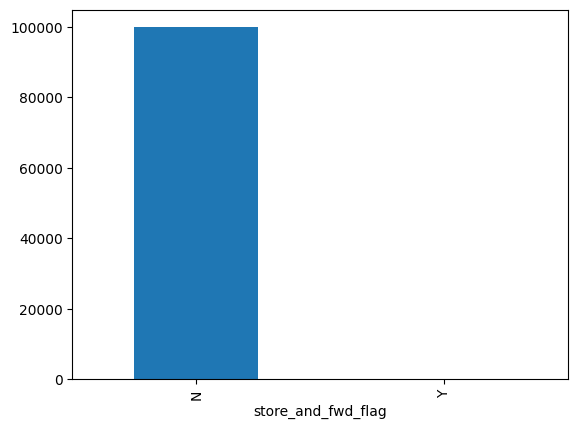

In [13]:
df['store_and_fwd_flag'].value_counts().plot(kind='bar')

<Axes: xlabel='passenger_count'>

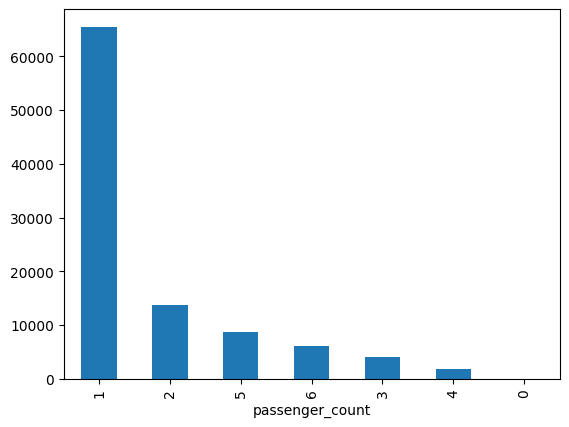

In [14]:
df['passenger_count'].value_counts().plot(kind='bar')

In [15]:
df['passenger_count'].value_counts()

passenger_count
1    65493
2    13709
5     8748
6     6077
3     4076
4     1894
0        3
Name: count, dtype: int64

In [16]:
rate_code_type = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}
df['RatecodeID'] = df['RatecodeID'].map(rate_code_type)

In [17]:
df.rename(columns={'RatecodeID': 'rate_code_type'}, inplace=True)

In [18]:
df['rate_code_type'].value_counts()

rate_code_type
Standard rate            97199
JFK                       2207
Negotiated fare            283
Newark                     262
Nassau or Westchester       48
Group ride                   1
Name: count, dtype: int64

<Axes: xlabel='rate_code_type'>

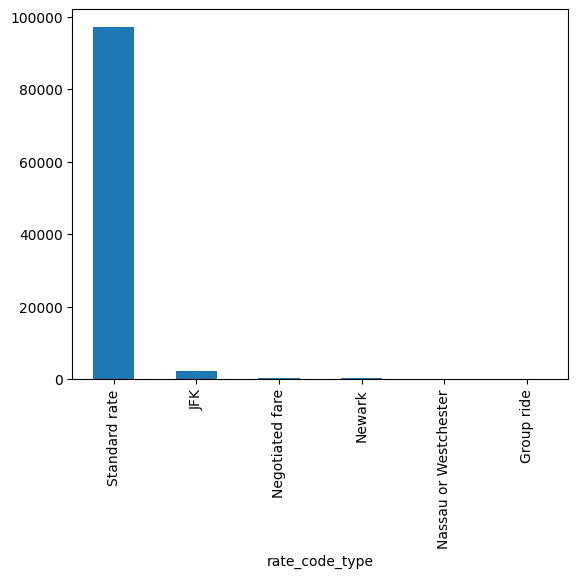

In [19]:
df['rate_code_type'].value_counts().plot(kind='bar')

In [20]:
payment_mode_type = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute"
}
df['payment_type'] = df['payment_type'].map(payment_mode_type)

In [21]:
df['payment_type'].value_counts()

payment_type
Credit card    66548
Cash           33203
No charge        173
Dispute           76
Name: count, dtype: int64

<Axes: xlabel='payment_type'>

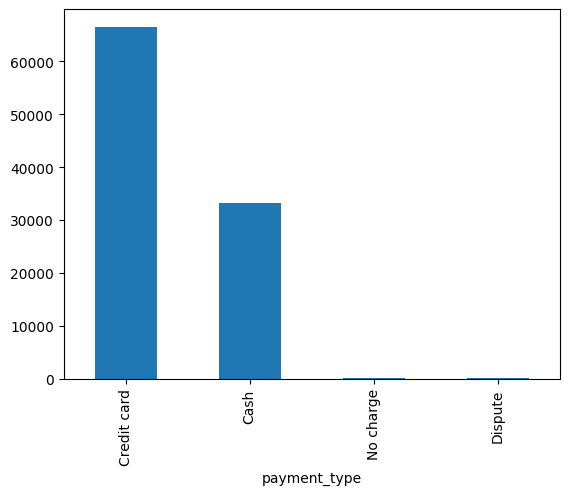

In [22]:
df['payment_type'].value_counts().plot(kind='bar')

<Axes: xlabel='extra'>

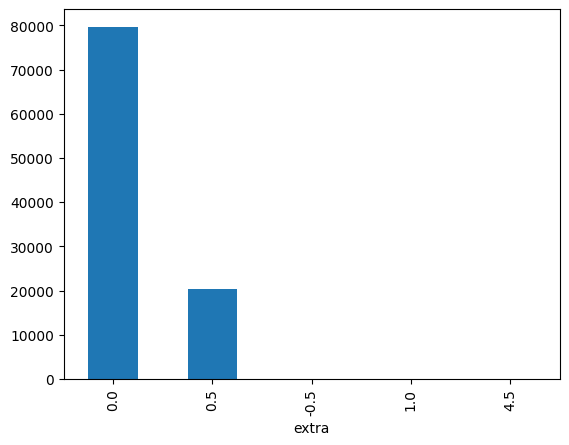

In [23]:
df['extra'].value_counts().plot(kind='bar')

In [24]:
df['extra'].value_counts()

extra
 0.0    79649
 0.5    20313
-0.5       19
 1.0       18
 4.5        1
Name: count, dtype: int64

<Axes: xlabel='mta_tax'>

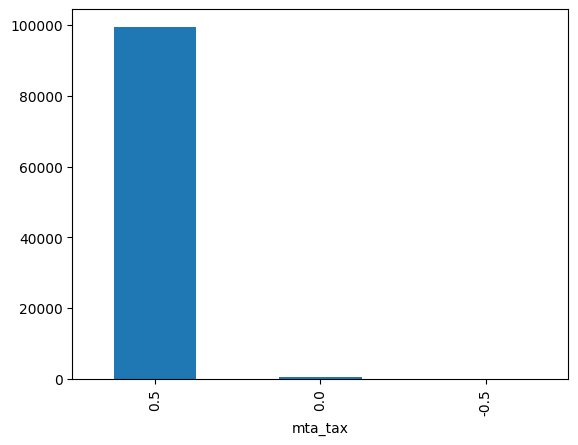

In [25]:
df['mta_tax'].value_counts().plot(kind='bar')

In [26]:
df['mta_tax'].value_counts()

mta_tax
 0.5    99466
 0.0      468
-0.5       66
Name: count, dtype: int64

<Axes: xlabel='improvement_surcharge'>

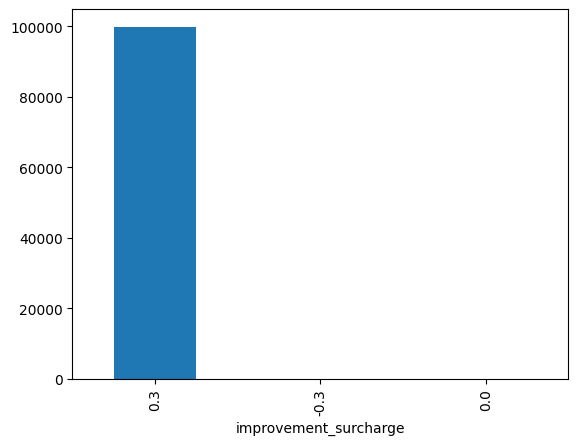

In [27]:
df['improvement_surcharge'].value_counts().plot(kind='bar')

In [28]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 0.3    99902
-0.3       70
 0.0       28
Name: count, dtype: int64

#### Numerical Columns

**Trip Distance**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   rate_code_type         100000 non-null  object        
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  object        
 12  fare_amount            100000 non-null  float

In [30]:
df['trip_distance'].describe()

count    100000.000000
mean          3.034270
std           3.846951
min           0.000000
25%           0.990000
50%           1.670000
75%           3.200000
max         184.400000
Name: trip_distance, dtype: float64

<Axes: ylabel='Frequency'>

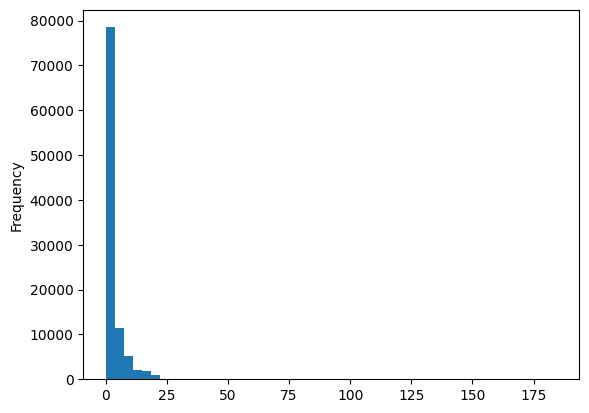

In [31]:
df['trip_distance'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

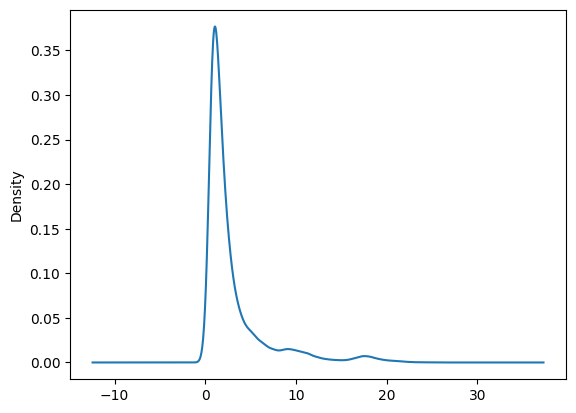

In [32]:
df[(df['trip_distance'] >= 0) & (df['trip_distance'] <= 25)]['trip_distance'].plot(kind='density')

<Axes: ylabel='Density'>

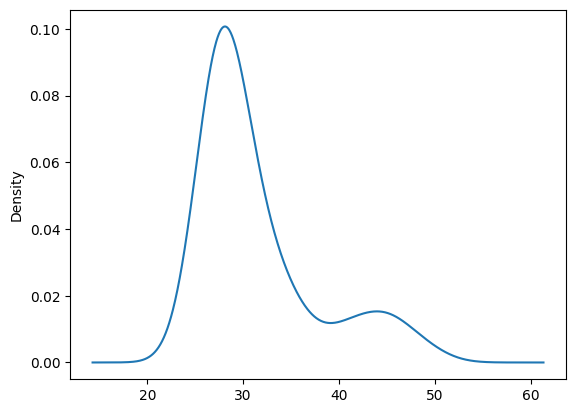

In [33]:
df[(df['trip_distance'] >= 26) & (df['trip_distance'] <= 50)]['trip_distance'].plot(kind='density')

<Axes: ylabel='Density'>

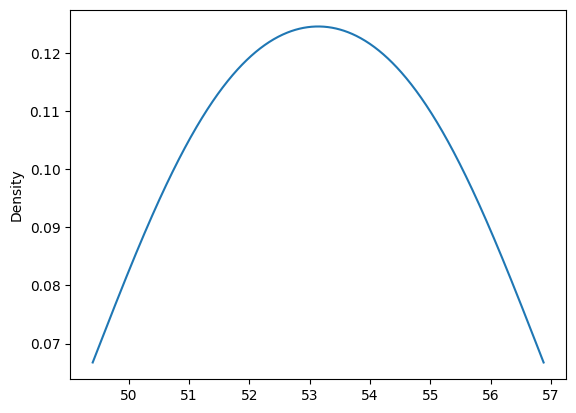

In [34]:
df[(df['trip_distance'] >= 50) & (df['trip_distance'] <= 75)]['trip_distance'].plot(kind='density')

<Axes: ylabel='Density'>

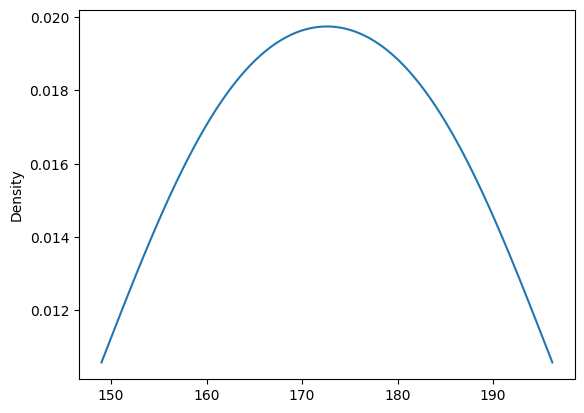

In [35]:
df[df['trip_distance'] >= 75]['trip_distance'].plot(kind='density')

<Axes: >

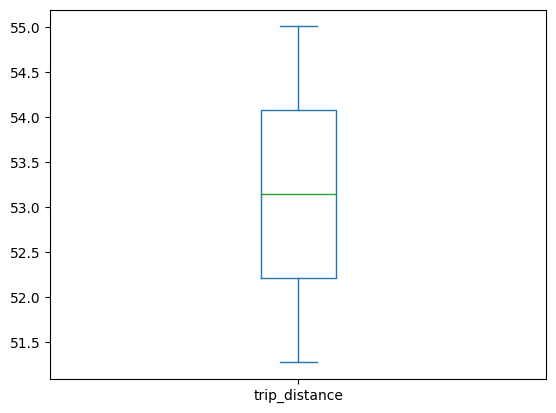

In [38]:
df[(df['trip_distance'] >= 50) & (df['trip_distance'] <= 75)]['trip_distance'].plot(kind='box')

<Axes: >

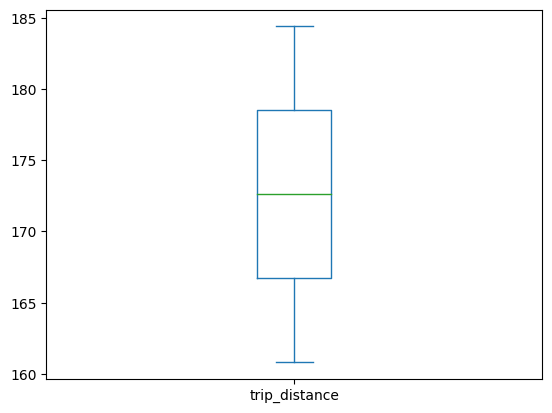

In [39]:
df[df['trip_distance'] >= 75]['trip_distance'].plot(kind='box')

**Fare Amount**

In [40]:
df['fare_amount'].describe()

count    100000.000000
mean         13.252608
std          11.685574
min         -47.000000
25%           6.500000
50%           9.500000
75%          15.000000
max         819.500000
Name: fare_amount, dtype: float64

In [41]:
df[df['fare_amount'] == df['fare_amount'].max()][['trip_distance', 'total_amount']]

,trip_distance,total_amount
75653,160.8,832.8


In [42]:
df[df['trip_distance'] == df['trip_distance'].max()]['fare_amount']

99665    52.0
Name: fare_amount, dtype: float64

In [43]:
df[df['trip_distance'] == df['trip_distance'].max()]['total_amount']

99665    58.34
Name: total_amount, dtype: float64

In [44]:
df[df['fare_amount'] == df['fare_amount'].min()]['trip_distance']

84683    0.41
Name: trip_distance, dtype: float64

<Axes: ylabel='Frequency'>

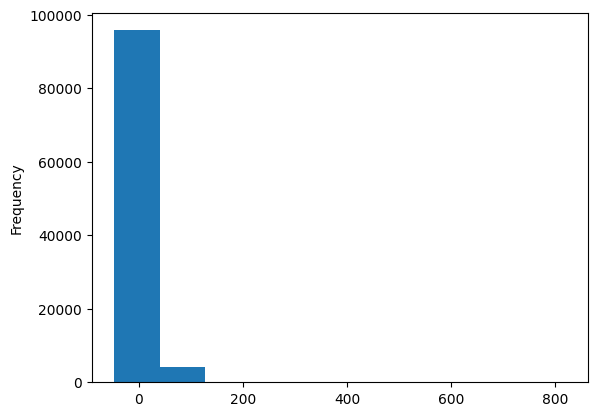

In [45]:
df['fare_amount'].plot(kind='hist')

<Axes: ylabel='Density'>

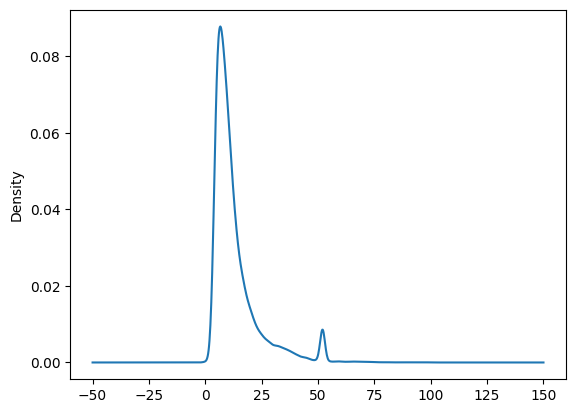

In [46]:
df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]['fare_amount'].plot(kind='kde')

<Axes: ylabel='Density'>

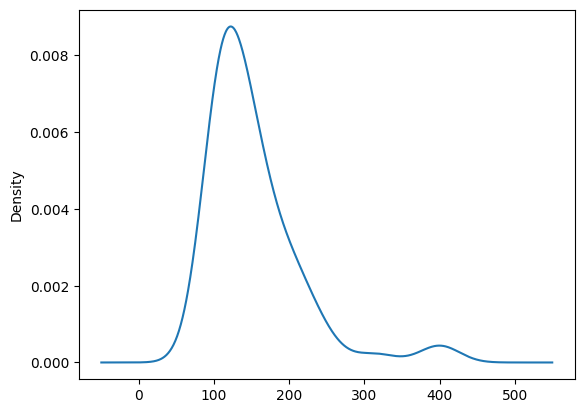

In [47]:
df[(df['fare_amount'] >= 100) & (df['fare_amount'] <= 500)]['fare_amount'].plot(kind='kde')

In [48]:
df['fare_amount'].mode()

0    6.0
Name: fare_amount, dtype: float64

In [49]:
df[df['fare_amount'] == df['fare_amount'].mode()[0]]['fare_amount'].count()

4662

**Tip Amount**

In [50]:
df['tip_amount'].describe()

count    100000.000000
mean          1.872531
std           2.618611
min          -2.700000
25%           0.000000
50%           1.360000
75%           2.460000
max         125.880000
Name: tip_amount, dtype: float64

In [51]:
df[df['tip_amount'] == df['tip_amount'].max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code_type,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
44067,2,2016-03-10 11:15:19,2016-03-10 11:15:31,1,0.0,-73.980827,40.741871,Standard rate,N,-73.98085,40.741879,Credit card,2.5,0.0,0.5,125.88,0.0,0.3,129.18


In [52]:
df['tip_amount'].mode()[0]

0.0

In [53]:
df[df['tip_amount'] == df['tip_amount'].mode()[0]]['tip_amount'].count()

36401

Total number of passengers with tip amount 0 are 36,401.

<Axes: ylabel='Density'>

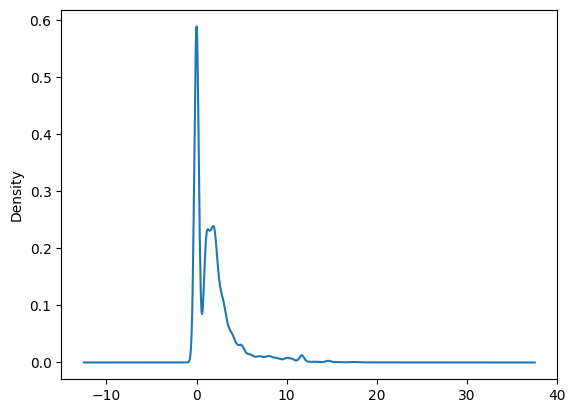

In [54]:
df[(df['tip_amount'] >= 0) & (df['tip_amount'] <= 25)]['tip_amount'].plot(kind='kde')

<Axes: ylabel='Density'>

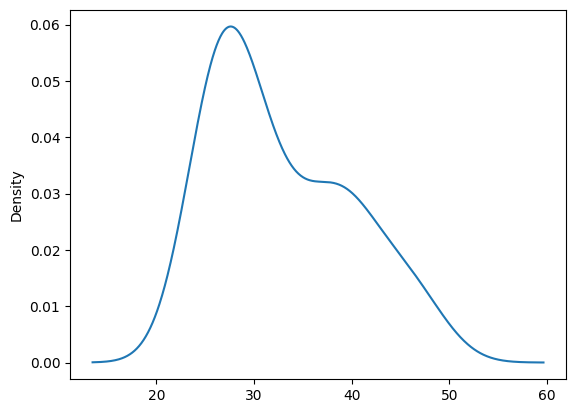

In [55]:
df[(df['tip_amount'] >= 25) & (df['tip_amount'] <= 50)]['tip_amount'].plot(kind='kde')

<Axes: ylabel='Density'>

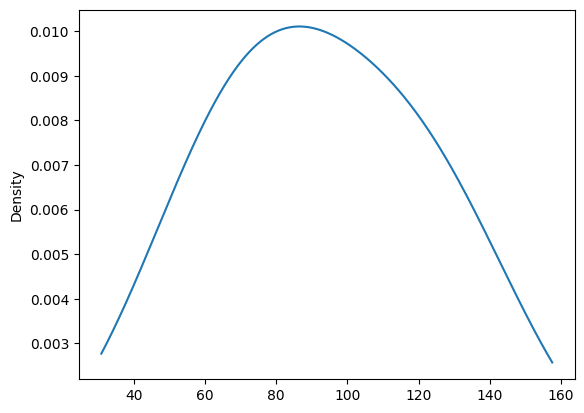

In [56]:
df[(df['tip_amount'] >= 50) & (df['tip_amount'] <= 125.88)]['tip_amount'].plot(kind='kde')

**Toll Amount**

<Axes: ylabel='Frequency'>

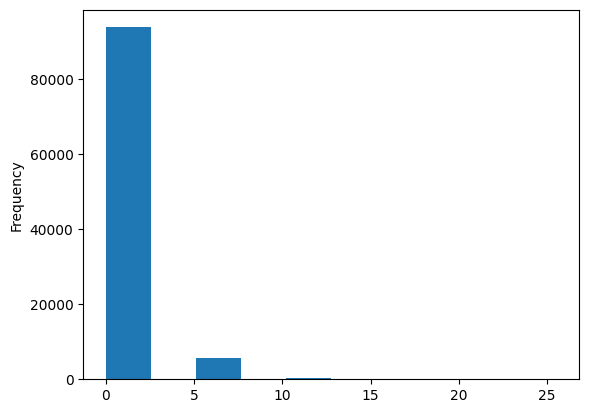

In [57]:
df['tolls_amount'].plot(kind='hist')

In [58]:
df['tolls_amount'].value_counts()

tolls_amount
0.00     93880
5.54      5700
12.50       98
10.50       83
2.54        34
         ...  
16.54        1
17.45        1
7.00         1
16.80        1
14.05        1
Name: count, Length: 75, dtype: int64

In [59]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code_type,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,Standard rate,N,-74.004265,40.746128,Credit card,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,Standard rate,N,-74.005943,40.733166,Credit card,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,Standard rate,N,-73.974541,40.675770,Credit card,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,Standard rate,N,-73.969650,40.757767,Credit card,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,Newark,N,-74.177170,40.695053,Credit card,98.0,0.0,0.0,0.00,15.50,0.3,113.80


**Total Amount**

Total amount is based on `fare_amount`, `mta_tax`, `tip_amount`, `tolls_amount` and `improvement_surcharge`. It is the **addition** of all these features.

In [60]:
df['total_amount'].describe()

count    100000.000000
mean         16.390721
std          14.437180
min         -47.300000
25%           8.300000
50%          11.800000
75%          18.300000
max         832.800000
Name: total_amount, dtype: float64

<Axes: >

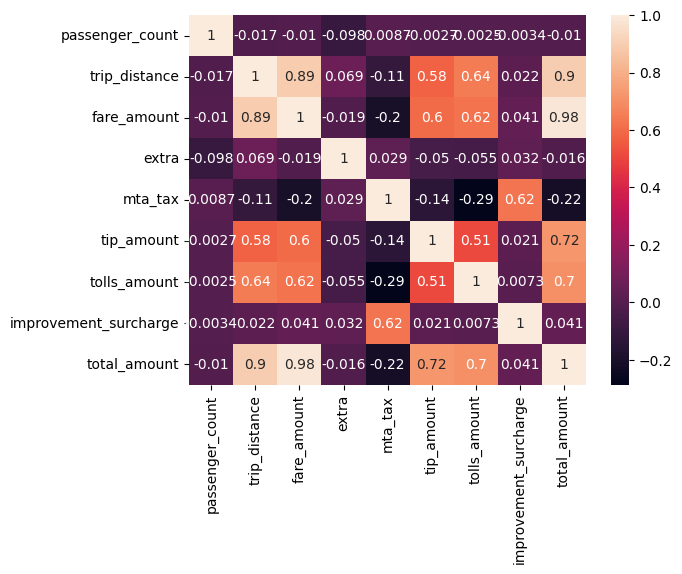

In [65]:
sns.heatmap(df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']].corr(), annot=True)